In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

In [3]:
df=pd.read_csv("American_bankruptcy.csv")

In [4]:
df.head(5)

,company_name,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [7]:
df.drop("company_name", axis =1)

,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [8]:
df.describe()

,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market value                   78682 non-null  float64
 11  Net sales                      78682 non-null  float64
 12  Total assets                   78682 non-null 

In [10]:
df.corr()

C:\Users\linco\AppData\Local\Temp\ipykernel_19800\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
year,1.000000,0.096764,0.065320,0.078040,0.082694,0.073918,0.063232,0.082141,0.080689,0.075471,0.100649,0.121160,0.077256,0.084388,0.085043,0.052765,0.075471,0.104300,0.070588
Current assets,0.096764,1.000000,0.660564,0.659173,0.812872,0.638698,0.657366,0.851945,0.826568,0.758712,0.824172,0.641522,0.806540,0.839140,0.903493,0.549777,0.758712,0.794479,0.713187
Cost of goods sold,0.065320,0.660564,1.000000,0.601328,0.674880,0.780846,0.517079,0.662863,0.556610,0.975963,0.681138,0.479374,0.646028,0.723855,0.784213,0.593223,0.975963,0.657386,0.988994
Depreciation and amortization,0.078040,0.659173,0.601328,1.000000,0.853222,0.426229,0.534297,0.696474,0.668160,0.700824,0.911330,0.781753,0.712093,0.796021,0.752106,0.588563,0.700824,0.877051,0.639004
EBITDA,0.082694,0.812872,0.674880,0.853222,1.000000,0.512667,0.766148,0.779820,0.859896,0.796124,0.916728,0.730642,0.973745,0.923711,0.835342,0.674287,0.796124,0.865836,0.719960
Inventory,0.073918,0.638698,0.780846,0.426229,0.512667,1.000000,0.395436,0.503019,0.483074,0.791135,0.553202,0.415740,0.504091,0.657215,0.719630,0.436993,0.791135,0.557678,0.808342
Net Income,0.063232,0.657366,0.517079,0.534297,0.766148,0.395436,1.000000,0.588943,0.714706,0.606444,0.646947,0.434078,0.798147,0.696554,0.637441,0.628653,0.606444,0.587707,0.547576
Total Receivables,0.082141,0.851945,0.662863,0.696474,0.779820,0.503019,0.588943,1.000000,0.684549,0.726521,0.806388,0.645599,0.745765,0.731790,0.872734,0.570250,0.726521,0.807136,0.682650
Market value,0.080689,0.826568,0.556610,0.668160,0.859896,0.483074,0.714706,0.684549,1.000000,0.685420,0.789200,0.576519,0.865917,0.853052,0.762850,0.629782,0.685420,0.712536,0.620050
Net sales,0.075471,0.758712,0.975963,0.700824,0.796124,0.791135,0.606444,0.726521,0.685420,1.000000,0.784902,0.581507,0.765814,0.856822,0.858866,0.635692,1.000000,0.754276,0.993149


In [12]:
df['status_label'] = df['status_label'].replace({'alive': 1, 'failed': 0})

In [13]:
df_train = df.query('year < 2016')
df_test = df.query('year >= 2016')

In [14]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69754 entries, 0 to 78678
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   69754 non-null  object 
 1   status_label                   69754 non-null  int64  
 2   year                           69754 non-null  int64  
 3   Current assets                 69754 non-null  float64
 4   Cost of goods sold             69754 non-null  float64
 5   Depreciation and amortization  69754 non-null  float64
 6   EBITDA                         69754 non-null  float64
 7   Inventory                      69754 non-null  float64
 8   Net Income                     69754 non-null  float64
 9   Total Receivables              69754 non-null  float64
 10  Market value                   69754 non-null  float64
 11  Net sales                      69754 non-null  float64
 12  Total assets                   69754 non-null 

In [15]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 17 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   8928 non-null   object 
 1   status_label                   8928 non-null   int64  
 2   year                           8928 non-null   int64  
 3   Current assets                 8928 non-null   float64
 4   Cost of goods sold             8928 non-null   float64
 5   Depreciation and amortization  8928 non-null   float64
 6   EBITDA                         8928 non-null   float64
 7   Inventory                      8928 non-null   float64
 8   Net Income                     8928 non-null   float64
 9   Total Receivables              8928 non-null   float64
 10  Market value                   8928 non-null   float64
 11  Net sales                      8928 non-null   float64
 12  Total assets                   8928 non-null  

In [16]:
X = df_train.drop(columns=['status_label', 'company_name'])
y = df_train['status_label']

X_test = df_test.drop(columns=['status_label', 'company_name'])
y_test = df_test['status_label']

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [19]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    random_state=42,
    objective='binary:logistic')

In [20]:
xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    early_stopping_rounds=100,
    verbose=100
)

C:\Users\linco\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\linco\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.69231	validation_1-auc:0.65659
[100]	validation_0-auc:0.94267	validation_1-auc:0.82260
[200]	validation_0-auc:0.98083	validation_1-auc:0.83769
[300]	validation_0-auc:0.99471	validation_1-auc:0.84206
[400]	validation_0-auc:0.99877	validation_1-auc:0.84455
[499]	validation_0-auc:0.99976	validation_1-auc:0.84671


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [21]:
y_val_pred = xgb.predict_proba(X_val)[:, 1]

In [1]:
roc_auc = roc_auc_score(y_val, y_val_pred)

NameError: name 'roc_auc_score' is not defined

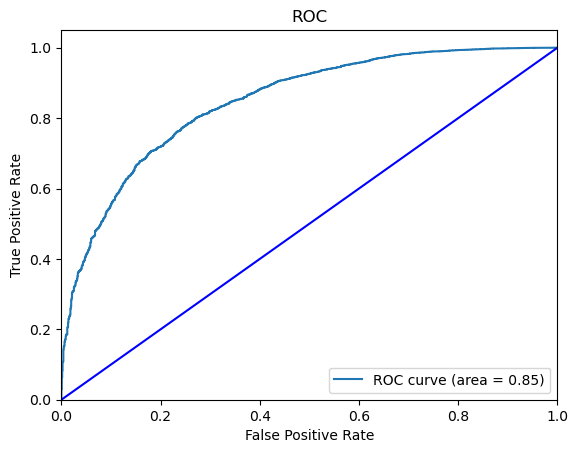

In [38]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_val, y_val_pred))
plt.plot([0, 1], [0, 1], color='blue', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()